# Evaluation Python année 2016-2017 - solution

Le répertoire [data](https://github.com/sdpython/actuariat_python/tree/master/_doc/notebooks/examen/data) contient deux fichiers csv simulés aléatoirement dont il faudra se servir pour répondre aux 10 questions qui suivent. Chaque question vaut deux points. Le travail est à rendre pour le lundi 20 février sous la forme d'un notebook envoyé en pièce jointe d'un mail.

In [1]:
%matplotlib inline

In [2]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## 1

*Deux fichiers sont extraits de la base de données d'un médecin. Un fichier contient des informations sur des personnes, un autre sur les rendez-vous pris par ces personnes. Quels sont-ils ?*

In [3]:
import pandas
persons = pandas.read_csv("https://raw.githubusercontent.com/sdpython/actuariat_python/master/_doc/notebooks/examen/data/persons.txt",
                     sep="\t")
persons.head()                     

,age,gender,idc,name
0,37,0,4ba0b473-f8ca-4466-a65b-40e9b8ba5029,Cendrillon
1,41,0,f44b004b-b01e-4835-b86d-1a42846c6d93,Cendrillon
2,46,1,304895f0-f686-4b0e-8854-a705bb5a6982,Balthazar
3,42,1,3f0d31d2-0ef4-4e7e-b876-07d10225cc8c,Balthazar
4,41,1,f29273f4-a76c-4158-b5f5-b3e5a080a0c7,Balthazar


In [4]:
rend = pandas.read_csv("https://raw.githubusercontent.com/sdpython/actuariat_python/master/_doc/notebooks/examen/data/rendezvous.txt",
                     sep="\t")
rend.head()  

,date,idc,idr,price
0,2016-12-02 19:47:45.068274,4ba0b473-f8ca-4466-a65b-40e9b8ba5029,b7db0ac9-86a1-46f9-98ac-f1f8eb54072d,75.0
1,2016-12-02 19:47:45.068274,4ba0b473-f8ca-4466-a65b-40e9b8ba5029,a65f721a-de11-4a01-be71-b26e2da3ac00,65.0
2,2016-12-07 19:47:45.068274,f44b004b-b01e-4835-b86d-1a42846c6d93,644b1236-b9ee-4ef5-8ca7-d1adadb547c8,75.0
3,2016-12-17 19:47:45.068274,f44b004b-b01e-4835-b86d-1a42846c6d93,aff6ac9e-5dd0-434e-9888-f724f6d40969,80.0
4,2017-01-07 19:47:45.068274,f44b004b-b01e-4835-b86d-1a42846c6d93,9ca87507-aa95-49a9-88b3-86ec9fbc44d6,80.0


In [5]:
persons.shape, rend.shape

((1000, 4), (2537, 4))

Le second fichier est plus volumineux et contient une variable *price* qui ne peut pas être reliée aux personnes. Le premier fichier est celui des personnes, le second celui des rendez-vous. La variable *idc* est présente dans les deux tables. C'est elle qui identifie les personnes dans les deux tables.

## 2

*On souhaite étudier la relation entre le prix moyen payé par une personne, son âge et son genre. Calculer le prix moyen payé par une personne ?*

La table des rendez-vous contient toutes l'information nécessaire. La question était un peu ambiguë. On peut déterminer le prix moyen payé par personne, ou le prix moyen des prix moyens... On va répondre à la première option car la seconde n'a pas beaucoup d'intérêt et c'est très proche du prix moyen par rendez-vous, ce que la question aurait sans doute formulé dans ce sens si telle avait été son intention. On groupe par *idc* et on fait la moyenne.

In [6]:
gr = rend.groupby("idc").mean()
gr.head()

,price
idc,
003b0195-2acb-4f46-b7fa-28cf266a8f60,80.0
009e689c-51a1-4cef-99ca-a4ba364eba8d,80.0
00a213c2-1174-4359-8a67-fe710ec1b439,70.0
00e42818-aade-4758-a5f6-c78a6f235ea5,70.0
0153b785-9acd-4d28-aad1-62f8bf2faea3,75.0


## 3

*Faire la jointure entre les deux tables.*

In [7]:
join = persons.merge(gr.reset_index(), on="idc")
join.head()

,age,gender,idc,name,price
0,37,0,4ba0b473-f8ca-4466-a65b-40e9b8ba5029,Cendrillon,70.000000
1,41,0,f44b004b-b01e-4835-b86d-1a42846c6d93,Cendrillon,78.333333
2,46,1,304895f0-f686-4b0e-8854-a705bb5a6982,Balthazar,75.000000
3,42,1,3f0d31d2-0ef4-4e7e-b876-07d10225cc8c,Balthazar,95.000000
4,41,1,f29273f4-a76c-4158-b5f5-b3e5a080a0c7,Balthazar,90.000000


Cette jointure est assez simple puisque la colonne partagée porte le même nom dans les deux tables. On peut néanmoins se poser la question de savoir s'il y a des personnes qui n'ont pas de rendez-vous associé et réciproquement.

In [8]:
join.shape

(1000, 5)

In [9]:
join = persons.merge(gr.reset_index(), on="idc", how="outer")
join.shape

(1000, 5)

Visiblement, ce n'est pas le cas puisqu'une jointure incluant les éléments sans correspondances dans les deux tables n'ajoute pas plus d'éléments à la jointure.

## 4

*Tracer deux nuages de points (age, prix moyen) et (genre, prix moyen) ?*

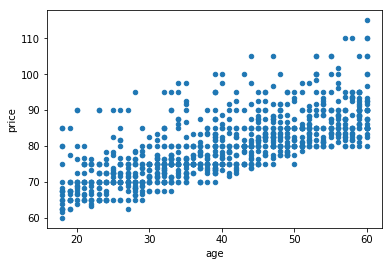

In [10]:
join.plot(x="age", y="price", kind="scatter")

On peut aussi utiliser un module comme [seaborn](http://seaborn.pydata.org/) qui propose des dessins intéressants pour un statisticatien.

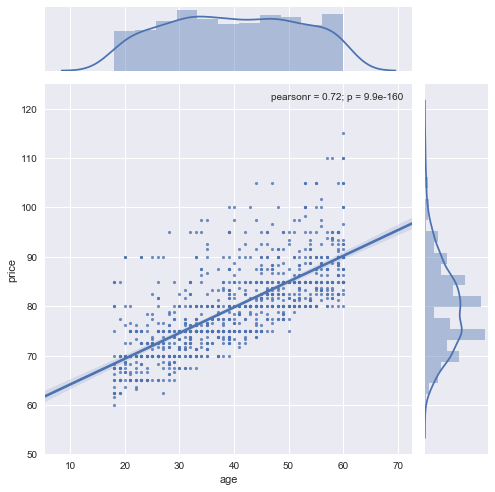

In [11]:
import seaborn
g = seaborn.jointplot("age", "price", data=join, kind="reg", size=7, scatter_kws={"s": 10})

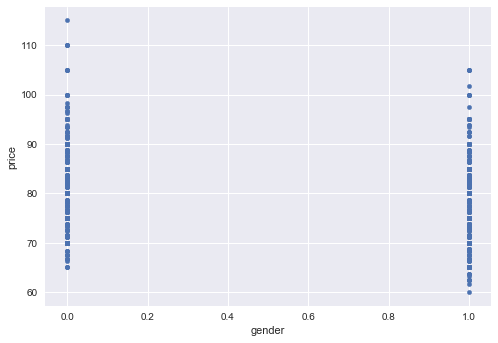

In [12]:
join.plot(x="gender", y="price", kind="scatter")

On ne voit pas grand chose sur ce second graphe. Une option est d'ajouter un bruit aléatoire sur le genre pour éclater le nuage.

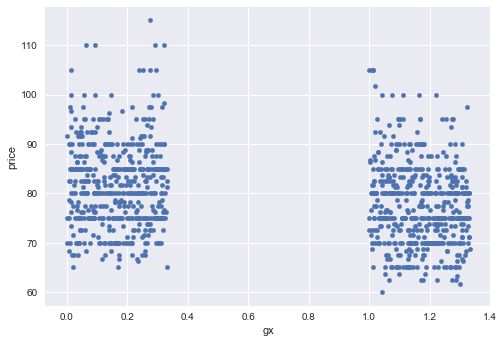

In [13]:
import numpy
bruit = join.copy()
bruit["gx"] = bruit.gender + numpy.random.random(bruit.shape[0])/3
bruit.plot(x="gx", y="price", kind="scatter")

Il n'y a rien de flagrant. On peut faire un graphe moustache.

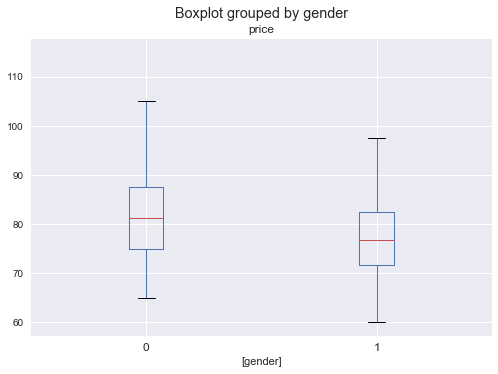

In [14]:
join[["price", "gender"]].boxplot(by="gender")

C'est mieux. Un dernier. Le diagramme violon, plus complet que le précédent.

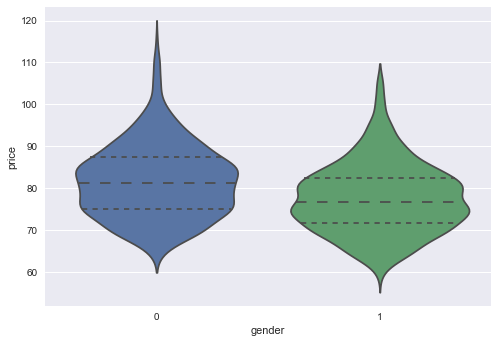

In [15]:
seaborn.violinplot(x="gender", y="price", data=join, inner="quart")

## 5

*Calculer les coefficients de la régression* $prix\_moyen \sim age + genre$.

Une régression. Le premier réflexe est [scikit-learn](http://scikit-learn.org/stable/).

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(join[["age", "gender"]], join["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
lr.coef_

array([ 0.52440734, -4.36373925])

In [18]:
lr.intercept_

61.050576719028669

On utilise maintenant [statsmodels](http://statsmodels.sourceforge.net/) qui est plus complet pour toute ce qui est modèle linéaire.

In [19]:
from statsmodels.api import OLS
lr = OLS(join["price"], join[["age", "gender"]])
res = lr.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     9424.
Date:                Sat, 11 Mar 2017   Prob (F-statistic):               0.00
Time:                        22:20:23   Log-Likelihood:                -4307.8
No. Observations:                1000   AIC:                             8620.
Df Residuals:                     998   BIC:                             8629.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            1.8234      0.019     96.317      0.000       1.786       1.861
gender         4.6088      1.099      4.195      0.000       2.453       6.765
==============================================================================
Omnibus:                       42.420   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.701
Skew:                           0.055   Prob(JB):                     8.69e-05
Kurtosis:                       2.339   Cond. No.                         80.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On peut aussi définir la régression sous la forme de formule avec le module [patsy](http://patsy.readthedocs.io/en/latest/index.html).

In [20]:
from patsy import dmatrices
y, X = dmatrices("price ~ age + gender" , join, return_type="matrix")
y = numpy.ravel(y)
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
lr.coef_

array([ 0.        ,  0.52440734, -4.36373925])

In [22]:
X[:2]

array([[  1.,  37.,   0.],
       [  1.,  41.,   0.]])

## 6

*On souhaite étudier le prix d'une consultation en fonction du jour de la semaine. Ajouter une colonne dans la table de votre choix avec le jour de la semaine.*

On convertit d'abord la colonne date (chaîne de caractères au format date) avec la fonction [to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html).

In [23]:
rend["date2"] = pandas.to_datetime(rend.date)
rend.dtypes

date             object
idc              object
idr              object
price           float64
date2    datetime64[ns]
dtype: object

Et on récupère le jour de la semaine avec [weekday](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.weekday.html).

In [24]:
rend["weekday"] = rend.date2.dt.weekday
rend.head()

,date,idc,idr,price,date2,weekday
0,2016-12-02 19:47:45.068274,4ba0b473-f8ca-4466-a65b-40e9b8ba5029,b7db0ac9-86a1-46f9-98ac-f1f8eb54072d,75.0,2016-12-02 19:47:45.068274,4
1,2016-12-02 19:47:45.068274,4ba0b473-f8ca-4466-a65b-40e9b8ba5029,a65f721a-de11-4a01-be71-b26e2da3ac00,65.0,2016-12-02 19:47:45.068274,4
2,2016-12-07 19:47:45.068274,f44b004b-b01e-4835-b86d-1a42846c6d93,644b1236-b9ee-4ef5-8ca7-d1adadb547c8,75.0,2016-12-07 19:47:45.068274,2
3,2016-12-17 19:47:45.068274,f44b004b-b01e-4835-b86d-1a42846c6d93,aff6ac9e-5dd0-434e-9888-f724f6d40969,80.0,2016-12-17 19:47:45.068274,5
4,2017-01-07 19:47:45.068274,f44b004b-b01e-4835-b86d-1a42846c6d93,9ca87507-aa95-49a9-88b3-86ec9fbc44d6,80.0,2017-01-07 19:47:45.068274,5


## 7

*Créer un graphe moustache qui permet de vérifier cette hypothèse.*

On réutilise le code d'une question précédente.

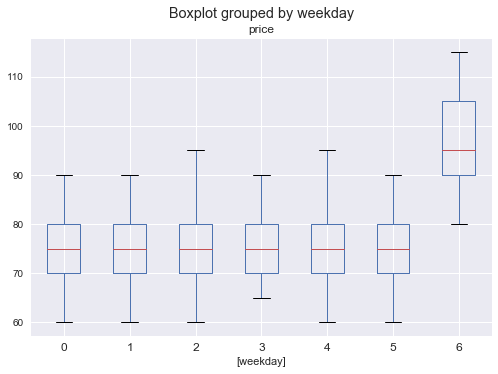

In [25]:
rend[["price", "weekday"]].boxplot(by="weekday")

C'est clairement plus cher le dimanche.

## 8

*Ajouter une colonne dans la table de votre choix qui contient 365 si c'est le premier rendez-vous, le nombre de jour écoulés depuis le précédent rendez-vous. On appelle cette colonne $delay$. On ajoute également la colonne* $1/delay$.

Pour commencer, on convertit la date en nombre de jours depuis la première date.

In [26]:
rend["constant"] = rend["date2"].min()
rend["jour"] = rend["date2"] - rend["constant"]
rend.head(n=2)

,date,idc,idr,price,date2,weekday,constant,jour
0,2016-12-02 19:47:45.068274,4ba0b473-f8ca-4466-a65b-40e9b8ba5029,b7db0ac9-86a1-46f9-98ac-f1f8eb54072d,75.0,2016-12-02 19:47:45.068274,4,2016-11-18 19:47:45.068274,14 days
1,2016-12-02 19:47:45.068274,4ba0b473-f8ca-4466-a65b-40e9b8ba5029,a65f721a-de11-4a01-be71-b26e2da3ac00,65.0,2016-12-02 19:47:45.068274,4,2016-11-18 19:47:45.068274,14 days


On convertit en entier.

In [27]:
rend["jouri"] = rend.jour.apply(lambda d: d.days)
rend.head(n=2)

,date,idc,idr,price,date2,weekday,constant,jour,jouri
0,2016-12-02 19:47:45.068274,4ba0b473-f8ca-4466-a65b-40e9b8ba5029,b7db0ac9-86a1-46f9-98ac-f1f8eb54072d,75.0,2016-12-02 19:47:45.068274,4,2016-11-18 19:47:45.068274,14 days,14
1,2016-12-02 19:47:45.068274,4ba0b473-f8ca-4466-a65b-40e9b8ba5029,a65f721a-de11-4a01-be71-b26e2da3ac00,65.0,2016-12-02 19:47:45.068274,4,2016-11-18 19:47:45.068274,14 days,14


On trie par patient et jour puis on effectue la différence.

In [28]:
diff = rend.sort_values(["idc", "jouri"])["jouri"].diff()
rend["diff"] = diff
rend.head(n=2)

,date,idc,idr,price,date2,weekday,constant,jour,jouri,diff
0,2016-12-02 19:47:45.068274,4ba0b473-f8ca-4466-a65b-40e9b8ba5029,b7db0ac9-86a1-46f9-98ac-f1f8eb54072d,75.0,2016-12-02 19:47:45.068274,4,2016-11-18 19:47:45.068274,14 days,14,-26.0
1,2016-12-02 19:47:45.068274,4ba0b473-f8ca-4466-a65b-40e9b8ba5029,a65f721a-de11-4a01-be71-b26e2da3ac00,65.0,2016-12-02 19:47:45.068274,4,2016-11-18 19:47:45.068274,14 days,14,0.0


Il reste à traiter le premier jour ou plutôt le premier rendez-vous. On le récupère pour chaque patient.

In [29]:
first = rend[["idc", "date"]].groupby("idc", as_index=False).min()
first["j365"] = 365
first.head(n=2)

,idc,date,j365
0,003b0195-2acb-4f46-b7fa-28cf266a8f60,2016-12-02 19:47:45.068274,365
1,009e689c-51a1-4cef-99ca-a4ba364eba8d,2016-11-26 19:47:45.068274,365


Puis on fait une jointure.

In [30]:
tout = rend.merge(first, on=["idc", "date"], how="outer")
tout[["idc", "jouri", "date", "j365"]].head(n=5)

,idc,jouri,date,j365
0,4ba0b473-f8ca-4466-a65b-40e9b8ba5029,14,2016-12-02 19:47:45.068274,365.0
1,4ba0b473-f8ca-4466-a65b-40e9b8ba5029,14,2016-12-02 19:47:45.068274,365.0
2,f44b004b-b01e-4835-b86d-1a42846c6d93,19,2016-12-07 19:47:45.068274,365.0
3,f44b004b-b01e-4835-b86d-1a42846c6d93,29,2016-12-17 19:47:45.068274,NaN
4,f44b004b-b01e-4835-b86d-1a42846c6d93,50,2017-01-07 19:47:45.068274,NaN


Il ne reste plus qu'à remplacer les NaN par *jouri*.

In [31]:
tout["delay"] = tout.j365.fillna(tout.jouri)
tout[["idc", "jouri", "date", "j365", "delay"]].head(n=8)

,idc,jouri,date,j365,delay
0,4ba0b473-f8ca-4466-a65b-40e9b8ba5029,14,2016-12-02 19:47:45.068274,365.0,365.0
1,4ba0b473-f8ca-4466-a65b-40e9b8ba5029,14,2016-12-02 19:47:45.068274,365.0,365.0
2,f44b004b-b01e-4835-b86d-1a42846c6d93,19,2016-12-07 19:47:45.068274,365.0,365.0
3,f44b004b-b01e-4835-b86d-1a42846c6d93,29,2016-12-17 19:47:45.068274,NaN,29.0
4,f44b004b-b01e-4835-b86d-1a42846c6d93,50,2017-01-07 19:47:45.068274,NaN,50.0
5,304895f0-f686-4b0e-8854-a705bb5a6982,1,2016-11-19 19:47:45.068274,365.0,365.0
6,3f0d31d2-0ef4-4e7e-b876-07d10225cc8c,30,2016-12-18 19:47:45.068274,365.0,365.0
7,f29273f4-a76c-4158-b5f5-b3e5a080a0c7,2,2016-11-20 19:47:45.068274,365.0,365.0


Finalement, il faut ajouter une colonne $1/delay$. Comme des patients ont parfois deux rendez-vous le même jour, pour éviter les valeurs nulles, on ajoute la colonne $1/(1+delay)$. On aurait pu également pour éviter les valeurs nulles considérer le temps en secondes et non en jour entre deux rendez-vous. 

In [32]:
tout["delay1"] = 1/ (tout["delay"] + 1)
tout[["delay", "delay1"]].head()

,delay,delay1
0,365.0,0.002732
1,365.0,0.002732
2,365.0,0.002732
3,29.0,0.033333
4,50.0,0.019608


## 9 

*Calculer les coefficients de la régression* $prix \sim age + genre + delay + 1/delay + jour\_semaine$.

L'âge ne fait pas partie de la table *tout*. Il faut faire une jointure pour le récupérer.

In [33]:
mat = tout.merge(persons, on="idc")

Ensuite retour à [scikit-learn](http://scikit-learn.org/stable/) et plutôt le second [statsmodels](http://statsmodels.sourceforge.net/) pour effectuer des tests sur les coefficients du modèle. On regarde d'abord les corrélations.

In [34]:
mat[["age", "gender", "delay", "delay1", "weekday", "price"]].corr()

,age,gender,delay,delay1,weekday,price
age,1.000000,0.030852,-0.010694,-0.023011,0.032413,0.614708
gender,0.030852,1.000000,0.008700,-0.026779,-0.000064,-0.198835
delay,-0.010694,0.008700,1.000000,-0.616038,0.039766,0.049796
delay1,-0.023011,-0.026779,-0.616038,1.000000,0.025400,-0.054954
weekday,0.032413,-0.000064,0.039766,0.025400,1.000000,0.448584
price,0.614708,-0.198835,0.049796,-0.054954,0.448584,1.000000


c:\python36_x64\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


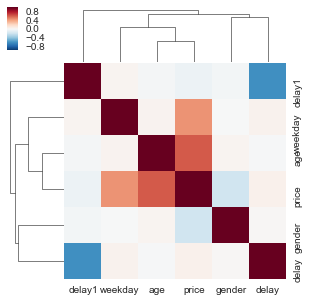

In [35]:
seaborn.clustermap(mat[["age", "gender", "delay", "delay1", "weekday", "price"]].corr(), figsize=(5,5))

Si le jeu de données n'est pas trop volumineux.

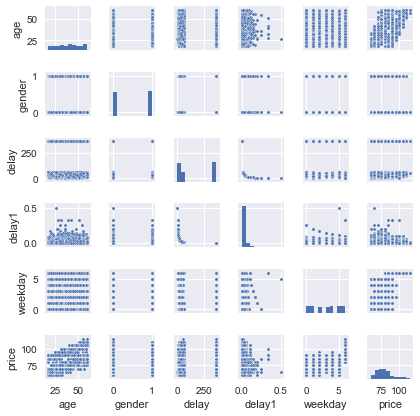

In [36]:
seaborn.pairplot(mat[["age", "gender", "delay", "delay1", "weekday", "price"]],
                 plot_kws={"s": 10}, size=1)

Un dernier pour la route.

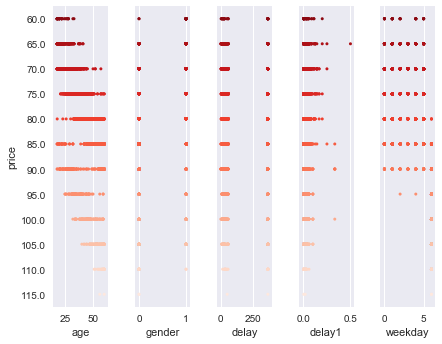

In [37]:
feat = mat[["age", "gender", "delay", "delay1", "weekday", "price"]]
g = seaborn.PairGrid(feat.sort_values("price", ascending=False), x_vars=feat.columns[:-1], 
                     y_vars=["price"], size=5, aspect=.25)
g.map(seaborn.stripplot, size=3, orient="h", palette="Reds_r", edgecolor="gray")

Régression

In [38]:
lr = LinearRegression()
lr.fit(mat[["age", "gender", "delay", "delay1", "weekday"]], mat["price"])
lr.coef_

array([  5.08109837e-01,  -4.41245429e+00,   5.42852787e-04,
        -1.60797483e+01,   2.12155016e+00])

In [39]:
from statsmodels.api import OLS
lr = OLS(mat["price"], mat[["age", "gender", "delay", "delay1", "weekday"]])
res = lr.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 1.575e+04
Date:                Sat, 11 Mar 2017   Prob (F-statistic):               0.00
Time:                        22:20:31   Log-Likelihood:                -10319.
No. Observations:                2537   AIC:                         2.065e+04
Df Residuals:                    2532   BIC:                         2.068e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            1.3110      0.015     86.283      0.000       1.281       1.341
gender         1.1481      0.549      2.093      0.036       0.072       2.224
delay          0.0439      0.002     22.464      0.000       0.040       0.048
delay1       193.0631      9.877     19.547      0.000     173.696     212.431
weekday        3.8071      0.133     28.641      0.000       3.546       4.068
==============================================================================
Omnibus:                       45.628   Durbin-Watson:                   1.311
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.096
Skew:                          -0.270   Prob(JB):                     2.95e-12
Kurtosis:                       3.458   Cond. No.                     8.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 10

*Comment comparer ce modèle avec le précédent ? Implémentez le calcul qui vous permet de répondre à cette question.*

Nous pourrions comparer les coefficients $R^2$ (0.950, 0.969) des régressions pour savoir quelle est la meilleur excepté que celle-ci ne sont pas calculées sur les mêmes données. La comparaison n'a pas de sens et il serait dangeraux d'en tirer des conclusions. Les valeurs sont de plus très proches. Il faut comparer les prédictions. Dans le premier cas, on prédit le prix moyen. Dans le second, on prédit le prix d'une consultation. Il est alors possible de calculer une prédiction moyenne par patient et de comparer les erreurs de prédiction du prix moyen. D'un côté, la prédiction du prix moyen, de l'autre la prédiction du prix d'une consultation agrégé par patient.

In [41]:
lr_moy = LinearRegression()
lr_moy.fit(join[["age", "gender"]], join["price"])
lr_moy.coef_, lr_moy.intercept_

(array([ 0.52440734, -4.36373925]), 61.050576719028669)

In [42]:
pred_moy = lr_moy.predict(join[["age", "gender"]])
join["pred_moy"] = pred_moy
join.head()

,age,gender,idc,name,price,pred_moy
0,37,0,4ba0b473-f8ca-4466-a65b-40e9b8ba5029,Cendrillon,70.000000,80.453648
1,41,0,f44b004b-b01e-4835-b86d-1a42846c6d93,Cendrillon,78.333333,82.551278
2,46,1,304895f0-f686-4b0e-8854-a705bb5a6982,Balthazar,75.000000,80.809575
3,42,1,3f0d31d2-0ef4-4e7e-b876-07d10225cc8c,Balthazar,95.000000,78.711946
4,41,1,f29273f4-a76c-4158-b5f5-b3e5a080a0c7,Balthazar,90.000000,78.187538


On calcule l'erreur.

In [43]:
err1 = ((join.pred_moy - join.price)**2).sum() / join.shape[0]
err1

31.87444884457175

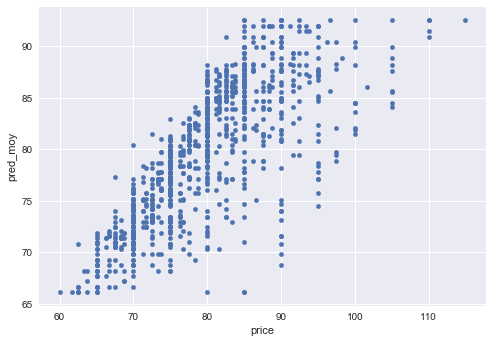

In [44]:
join.plot(x="price", y="pred_moy", kind="scatter")

In [45]:
lrc = LinearRegression()
feat = mat[["age", "gender", "delay", "delay1", "weekday", "price", "idc"]].copy()
lrc.fit(feat[["age", "gender", "delay", "delay1", "weekday"]], feat["price"])
lrc.coef_, lrc.intercept_

(array([  5.08109837e-01,  -4.41245429e+00,   5.42852787e-04,
         -1.60797483e+01,   2.12155016e+00]), 55.414609503334248)

In [46]:
predc = lrc.predict(feat[["age", "gender", "delay", "delay1", "weekday"]])
feat["predc"] = predc
feat.head()

,age,gender,delay,delay1,weekday,price,idc,predc
0,37,0,365.0,0.002732,4,75.0,4ba0b473-f8ca-4466-a65b-40e9b8ba5029,82.855082
1,37,0,365.0,0.002732,4,65.0,4ba0b473-f8ca-4466-a65b-40e9b8ba5029,82.855082
2,41,0,365.0,0.002732,2,75.0,f44b004b-b01e-4835-b86d-1a42846c6d93,80.644421
3,41,0,29.0,0.033333,5,80.0,f44b004b-b01e-4835-b86d-1a42846c6d93,86.334615
4,41,0,50.0,0.019608,5,80.0,f44b004b-b01e-4835-b86d-1a42846c6d93,86.566717


On agrège les secondes prédictions.

In [47]:
agg = feat[["idc","predc", "price"]].groupby("idc").mean()
agg.head()

,predc,price
idc,,
003b0195-2acb-4f46-b7fa-28cf266a8f60,85.048055,80.0
009e689c-51a1-4cef-99ca-a4ba364eba8d,83.945104,80.0
00a213c2-1174-4359-8a67-fe710ec1b439,72.345309,70.0
00e42818-aade-4758-a5f6-c78a6f235ea5,65.277461,70.0
0153b785-9acd-4d28-aad1-62f8bf2faea3,79.298313,75.0


In [48]:
err2 = ((agg.predc - agg.price)**2).sum() / agg.shape[0]
err2

20.6978360564799

Le second modèle est clairement meilleur.

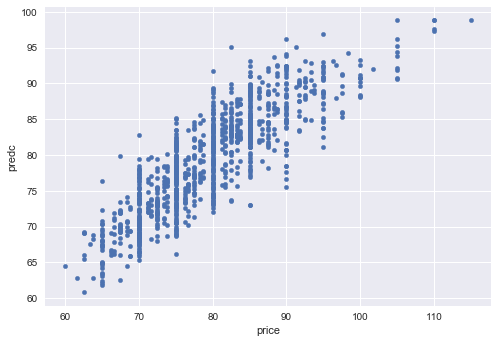

In [49]:
agg.plot(x="price", y="predc", kind="scatter")

La seconde régression utilise une information dont on ne dispose pas au niveau agrégé : le jour de la semaine et un précédent graphe a clairement montré que c'était une variable importante. Un dernier graphe pour comparer les deux prédictions en montrant les prédictions triées par prix à prédire.

In [50]:
temp = join.sort_values("price").reset_index(drop=True).reset_index(drop=False)
temp.head(n=1)

,index,age,gender,idc,name,price,pred_moy
0,0,18,1,6423a722-4769-4a7c-8d1d-266538c2a07a,Balthazar,60.0,66.12617


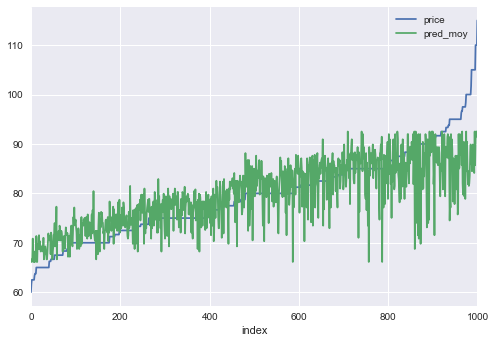

In [51]:
temp.plot(x="index", y=["price", "pred_moy"])

In [52]:
temp2 = agg.sort_values("price").reset_index(drop=True).reset_index(drop=False)
temp2.head(n=1)

,index,predc,price
0,0,64.54544,60.0


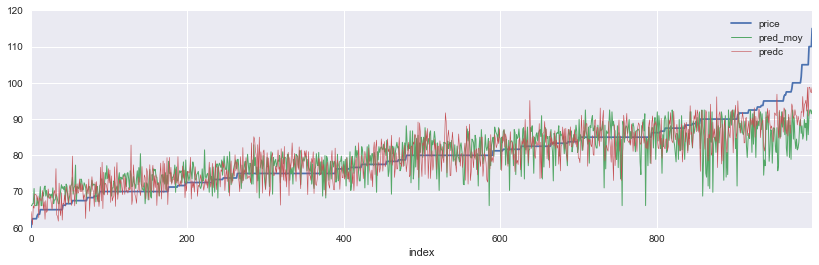

In [53]:
ax = temp.plot(x="index", y="price", figsize=(14,4), ylim=[60,120])
temp.plot(x="index", y="pred_moy", linewidth=1, ax=ax, ylim=[60,120])
temp2.plot(x="index", y="predc", ax=ax, linewidth=0.6, ylim=[60,120])

C'est finalement un peu plus visible sur le graphe précédent (nuage de points) mais aussi un peu trompeur du fait de la superposition des points. Une dernière remarque. En machine learning, nous avons l'habitude d'apprendre un modèle sur une base d'apprentissage et de tester les prédictions sur une autre. Dans notre cas, nous avons appris et prédit sur la même base. Ce type de tester est évidemment plus fiable. Mais nous avons comparé ici deux erreurs d'apprentissage moyennes et c'est exactement ce que l'on fait lorsqu'on compare deux coefficients $R^2$.